# Quick data visualization

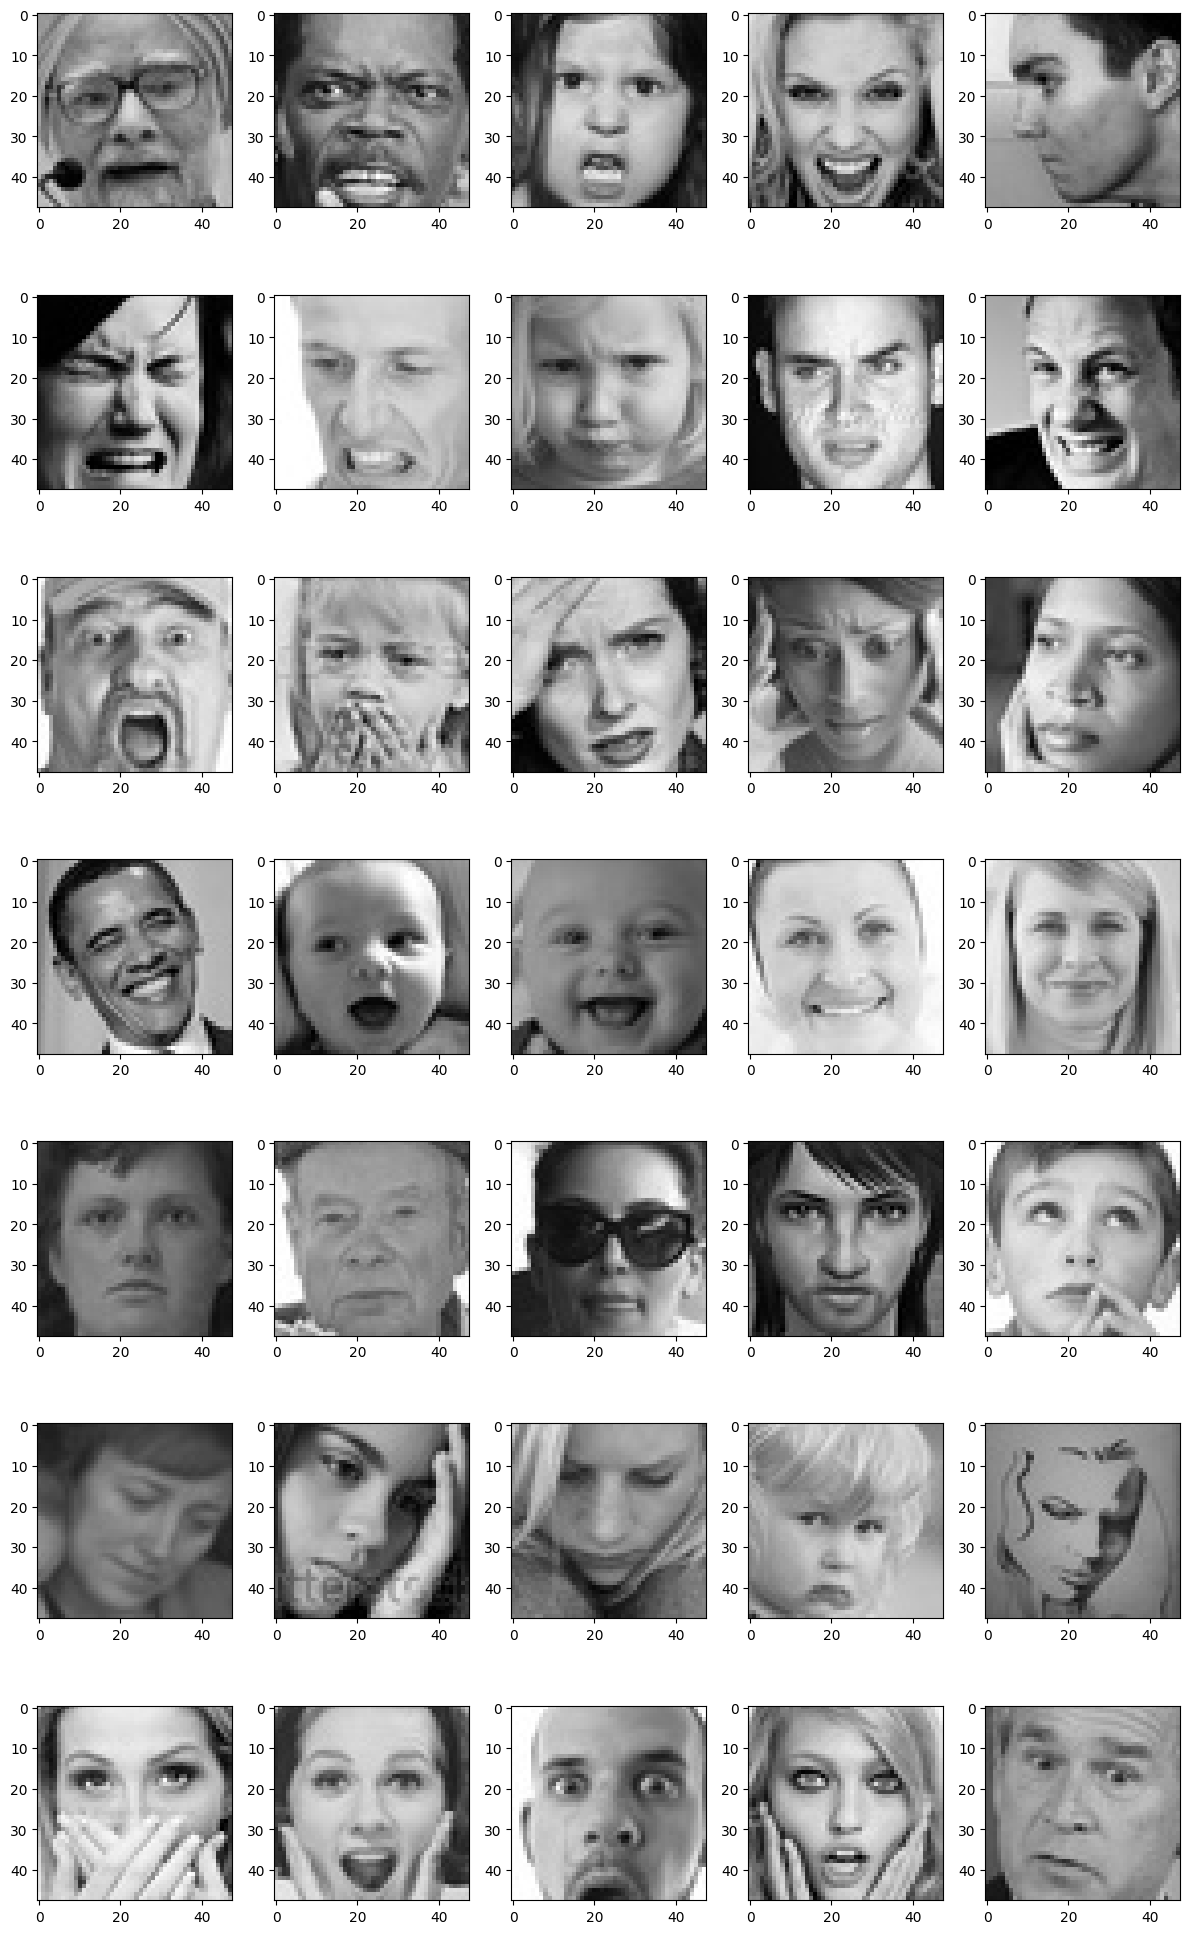

In [3]:
# display some images for every different expression

import numpy as np
import seaborn as sns
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import matplotlib.pyplot as plt
import os

# size of the image: 48*48 pixels
pic_size = 48

# input path for the images
base_path = "input2/"

plt.figure(0, figsize=(12,20))
cpt = 0

for expression in os.listdir(base_path + "train/"):
    for i in range(1,6):
        cpt = cpt + 1
        plt.subplot(7,5,cpt)
        img = load_img(base_path + "train/" + expression + "/" +
                       os.listdir(base_path + "train/" + expression)[i], 
                       target_size=(pic_size, pic_size))
        plt.imshow(img, cmap="gray")

plt.tight_layout()
plt.show()

In [3]:
# count number of train images for each expression

for expression in os.listdir(base_path + "train"):
    print(str(len(os.listdir(base_path + "train/" + expression))) + 
          " " + expression + " images")

3993 angry images
436 disgust images
4103 fear images
7164 happy images
4982 neutral images
4938 sad images
3205 surprise images


The image expressions in our training dataset are pretty balanced, except for the 'disgust' category.

# Setup the data generators

In [3]:
from keras.preprocessing.image import ImageDataGenerator

# number of images to feed into the NN for every batch
batch_size = 128

datagen_train = ImageDataGenerator()
datagen_validation = ImageDataGenerator()

train_generator = datagen_train.flow_from_directory(
    base_path + "train",
    target_size=(pic_size,pic_size),
    color_mode="grayscale",
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True)

validation_generator = datagen_validation.flow_from_directory(
    base_path + "validation",
    target_size=(pic_size,pic_size),
    color_mode="grayscale",
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False)

test_generator = datagen_validation.flow_from_directory(
    base_path + "test",
    target_size=(pic_size,pic_size),
    color_mode="grayscale",
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False)

Found 28821 images belonging to 7 classes.
Found 7066 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


# Setup our Convolutional Neural Network (CNN)

We chose to use a Convolutional Neural Network in order to tackle this face recognition problem. Indeed this type of Neural Network (NN) is good for extracting the features of images and is widely used for image analysis subjects like image classification.

**Quick reminder of what a NN is:**

A Neural Network is a learning framework that consists in multiple layers of artificial neurons (nodes). Each node gets weighted input data, passes it into an activation function and outputs the result of the function:

![](https://skymind.ai/images/wiki/perceptron_node.png)

A NN is composed of several layers of nodes:

![](https://www.researchgate.net/profile/Martin_Musiol/publication/308414212/figure/fig1/AS:409040078295040@1474534162122/A-general-model-of-a-deep-neural-network-It-consists-of-an-input-layer-some-here-two.png)

- An input layer that will get the data. The size of the input layer depends on the size of the input data.
- Some hidden layers that will allow the NN to learn complex interactions within the data. A Neural Network with a lot of hidden layers is called a Deep Neural Network.
- An output layer that will give the final result, for instance a class prediction. The size of this layer depends on the type of output we want to produce (e.g. how many classes do we want to predict?)

Classic NNs are usually composed of several fully connected layers. This means that every neuron of one layer is connected to every neurons of the next layer. 

Convolutional Neural Networks also have Convolutional layers that apply sliding functions to group of pixels that are next to each other. Therefore those structures have a better understanding of patterns that we can observe in images. We will explain this in more details after.

Now let's define the architecture of our CNN:

In [4]:
from keras.layers import Dense, Input, Dropout, GlobalAveragePooling2D,Flatten, Conv2D, BatchNormalization, Activation, MaxPooling2D
from keras.models import Model, Sequential
from keras.optimizers import Adam

# number of possible label values
nb_classes = 7

# Initialising the CNN
model = Sequential()

# 1 - Convolution
model.add(Conv2D(64,(3,3), padding='same', input_shape=(48, 48,1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# 2nd Convolution layer
model.add(Conv2D(128,(5,5), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# 3rd Convolution layer
model.add(Conv2D(512,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))



# 4th Convolution layer
model.add(Conv2D(512,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Flattening
model.add(Flatten())

# Fully connected layer 1st layer
model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

# Fully connected layer 2nd layer
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Dense(nb_classes, activation='softmax'))

opt = Adam(lr=0.0001)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

c:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\optimizers\legacy\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 64)        640       
                                                                 
 batch_normalization (BatchN  (None, 48, 48, 64)       256       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 48, 48, 64)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 24, 24, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 24, 24, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 128)       2

We define our CNN with the following global architecture:
- 4 convolutional layers
- 2 fully connected layers

The convolutional layers will extract relevant features from the images and the fully connected layers will focus on using these features to classify well our images. This architecture was inspired by the following work on the subject: https://github.com/jrishabh96/Facial-Expression-Recognition

Let's focus on how our convolution layers work. Each of them contain the following operations:
- A convolution operator: extracts features from the input image using sliding matrices to preserve the spatial relations between the pixels. The following image summarizes how it works:
![](http://deeplearning.stanford.edu/wiki/images/6/6c/Convolution_schematic.gif)

The green matrix corresponds to the raw image values. The orange sliding matrix is called a 'filter' or 'kernel'. This filter slides over the image by one pixel at each step (stride). During each step, we multiply the filter with the corresponding elements of the base matrix. There are different types of filters and each one will be able to retrieve different image features:
![](https://ujwlkarn.files.wordpress.com/2016/08/screen-shot-2016-08-05-at-11-03-00-pm.png?w=342&h=562)

- We apply the ReLU function to introduce non linearity in our CNN. Other functions like tanh or sigmoid could also be used, but ReLU has been found to perform better in most situations.
- Pooling is used to reduce the dimensionality of each features while retaining the most important information. Like for the convolutional step, we apply a sliding function on our data. Different functions can be applied: max, sum, mean... The max function usually performs better.
![](http://cs231n.github.io/assets/cnn/maxpool.jpeg)

We also use some common techniques for each layer:
- Batch normalization: improves the performance and stability of NNs by providing inputs with zero mean and unit variance.
- Dropout: reduces overfitting by randomly not updating the weights of some nodes. This helps prevent the NN from relying on one node in the layer too much.

We chose softmax as our last activation function as it is commonly used for multi-label classification.

Now that our CNN is defined, we can compile it with a few more parameters. We chose the Adam optimizer as it is one of the most computationally effective. We chose the categorical cross-entropy as our loss function as it is quite relevant for classification tasks. Our metric will be the accuracy, which is also quite informative for classification tasks on balanced datasets.

# Train the model

Everything is set up, let's train our model now!

In [5]:
%%time

# number of epochs to train the NN
epochs = 70

from keras.callbacks import ModelCheckpoint

checkpoint = ModelCheckpoint("model_weights.h5", monitor='val_acc', 
    verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

history = model.fit_generator(generator=train_generator,
    steps_per_epoch=train_generator.n//train_generator.batch_size,
    epochs=epochs,
    validation_data = validation_generator,
    validation_steps = validation_generator.n//validation_generator.batch_size,
    callbacks=callbacks_list
    )

<timed exec>:9: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.


Epoch 1/70
225/225 [==============================] - 1276s 6s/step - loss: 2.0462 - accuracy: 0.2276 - val_loss: 1.7092 - val_accuracy: 0.3134
Epoch 2/70
225/225 [==============================] - 1157s 5s/step - loss: 1.8077 - accuracy: 0.3088 - val_loss: 1.6759 - val_accuracy: 0.3531
Epoch 3/70
225/225 [==============================] - 1154s 5s/step - loss: 1.7174 - accuracy: 0.3440 - val_loss: 1.6906 - val_accuracy: 0.3712
Epoch 4/70
225/225 [==============================] - 1159s 5s/step - loss: 1.6438 - accuracy: 0.3692 - val_loss: 1.6253 - val_accuracy: 0.3955
Epoch 5/70
225/225 [==============================] - 1146s 5s/step - loss: 1.5839 - accuracy: 0.3888 - val_loss: 1.5685 - val_accuracy: 0.4136
Epoch 6/70
225/225 [==============================] - 1153s 5s/step - loss: 1.5292 - accuracy: 0.4134 - val_loss: 1.5938 - val_accuracy: 0.4136
Epoch 7/70
225/225 [==============================] - 1151s 5s/step - loss: 1.4804 - accuracy: 0.4280 - val_loss: 1.4101 - val_accuracy:

In [ ]:
# serialize model structure to JSON
model_json = model.to_json()
with open("model2.json", "w") as json_file:
    json_file.write(model_json)

# Analyze the results

We got outputs at each step of the training phase. All those outputs were saved into the 'history' variable. We can use it to plot the evolution of the loss and accuracy on both the train and validation datasets:

In [8]:
model.evaluate(test_generator)

57/57 [==============================] - 103s 2s/step - loss: 0.3370 - accuracy: 0.9132


[0.33697840571403503, 0.9132069945335388]

In [14]:
import matplotlib.pyplot as plt

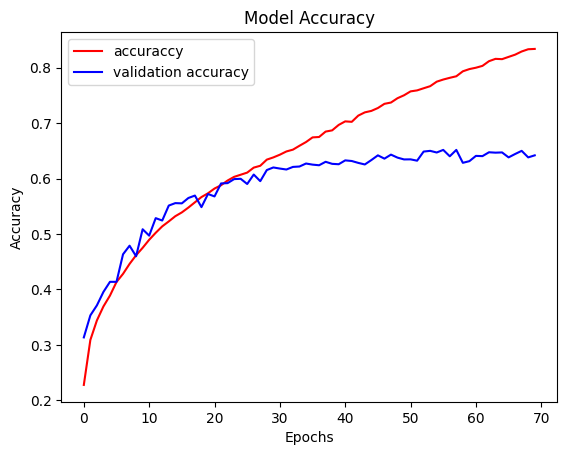

In [15]:
plt.plot(history.history['accuracy'],color='r')
plt.plot(history.history['val_accuracy'],color='b')
plt.legend(['accuraccy','validation accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

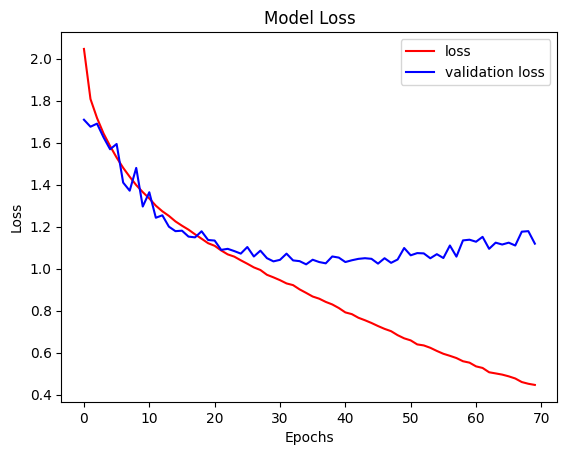

In [16]:
plt.plot(history.history['loss'],color='r')
plt.plot(history.history['val_loss'],color='b')
plt.legend(['loss','validation loss'])
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

In [18]:
# Predict classes
y_pred = np.argmax(model.predict(test_generator), axis=1)
y_true = test_generator.classes

57/57 [==============================] - 73s 1s/step


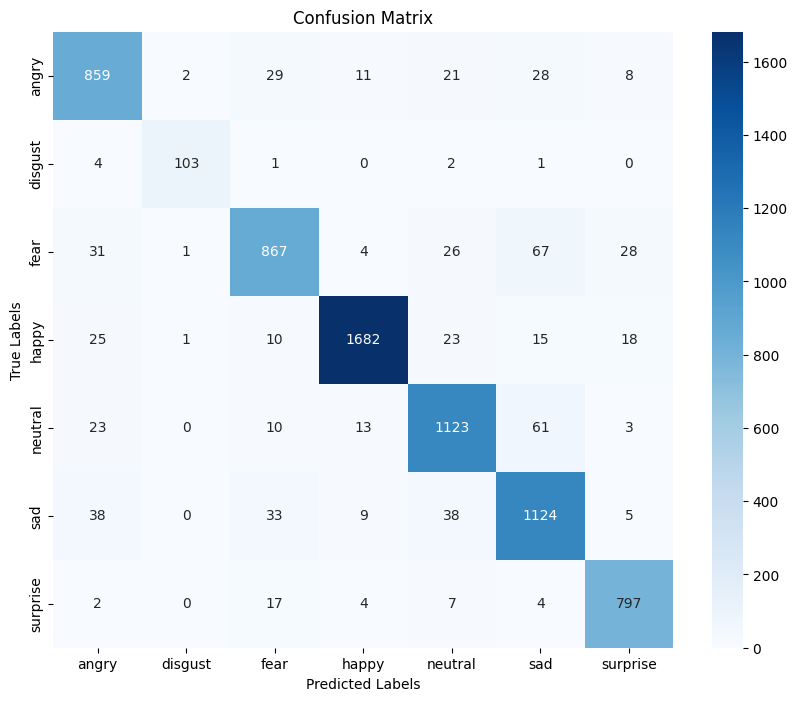

In [19]:
# Confusion Matrix
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
conf_matrix = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [20]:
# Classification Report
print(classification_report(y_true, y_pred, target_names=classes))

              precision    recall  f1-score   support

       angry       0.87      0.90      0.89       958
     disgust       0.96      0.93      0.94       111
        fear       0.90      0.85      0.87      1024
       happy       0.98      0.95      0.96      1774
     neutral       0.91      0.91      0.91      1233
         sad       0.86      0.90      0.88      1247
    surprise       0.93      0.96      0.94       831

    accuracy                           0.91      7178
   macro avg       0.92      0.91      0.91      7178
weighted avg       0.91      0.91      0.91      7178



In [ ]:
from tensorflow.keras.utils import img_to_array
import tensorflow as tf
import cv2

def load_model_from_json(json_path, weights_path):
    with open(json_path, 'r') as json_file:
        model_json = json_file.read()
    model = tf.keras.models.model_from_json(model_json)
    model.load_weights(weights_path)
    return model

model = load_model_from_json("model2.json", "model_weights.h5")

random = np.random.randint(0,200)
img_path_angry = []
img_path_disgust = []
img_path_fear = []
img_path_happy = []
img_path_neutral = []
img_path_sad = []
img_path_surprise = []

classes = ['angry','disgust','fear','happy','neutral','sad','surprise']

path = r'input2/test'

for j in os.walk(path):
    if classes[0] in j[0]:
        for i in j[2]:
            img_path_angry.append(fr'{j[0]}/{i}')
    elif classes[1] in j[0]:
        for i in j[2]:
            img_path_disgust.append(fr'{j[0]}/{i}')
    elif classes[2] in j[0]:
        for i in j[2]:
            img_path_fear.append(fr'{j[0]}/{i}')
    elif classes[3] in j[0]:
        for i in j[2]:
            img_path_happy.append(fr'{j[0]}/{i}')
    elif classes[4] in j[0]:
        for i in j[2]:
            img_path_neutral.append(fr'{j[0]}/{i}')
    elif classes[5] in j[0]:
        for i in j[2]:
            img_path_sad.append(fr'{j[0]}/{i}')
    elif classes[6] in j[0]:
        for i in j[2]:
            img_path_surprise.append(fr'{j[0]}/{i}')

1/1 [==============================] - 0s 87ms/step
[8.2852566e-01 4.0426352e-03 3.0561114e-02 2.4856586e-04 5.0348967e-02
 6.5008931e-02 2.1264149e-02]


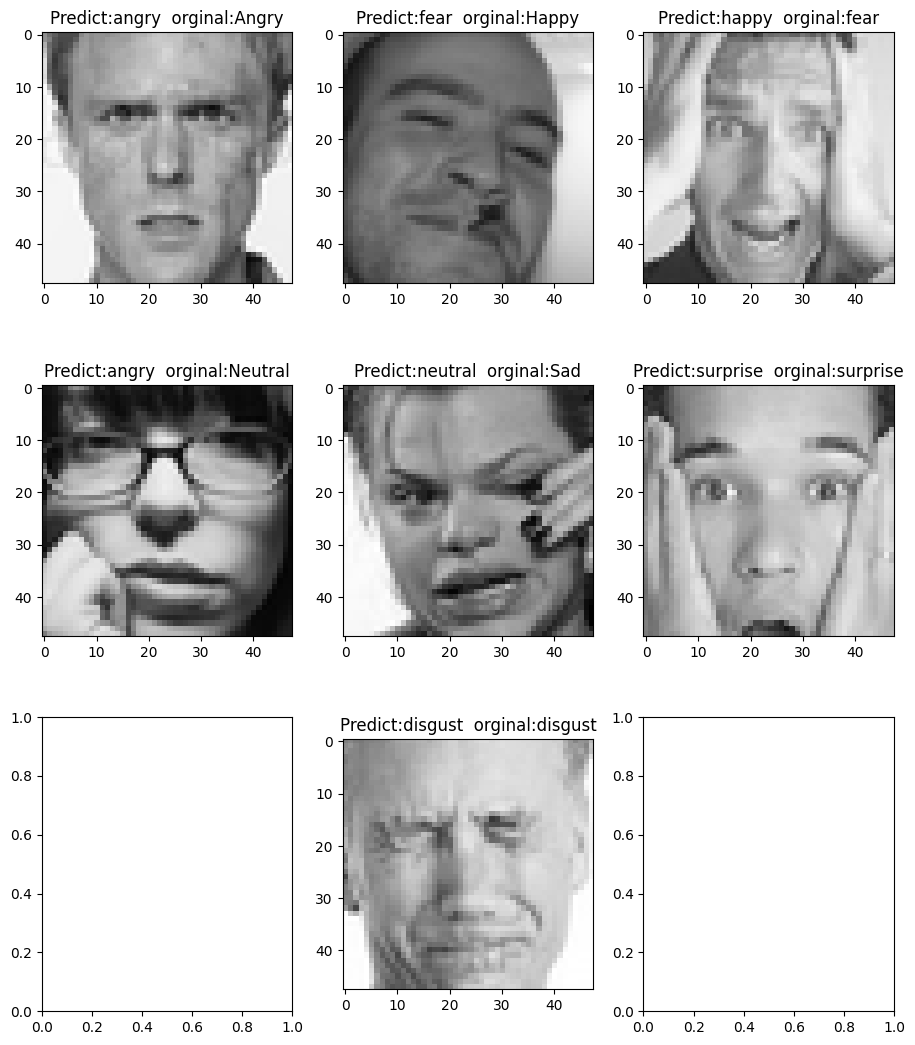

In [8]:
def plot_pred_image():
    
    i = np.random.randint(0,100)

    img_angry = cv2.imread(img_path_angry[i])
    img_disgust = cv2.imread(img_path_disgust[i])
    img_fear = cv2.imread(img_path_fear[i])
    img_happy = cv2.imread(img_path_happy[i])
    img_neutral = cv2.imread(img_path_neutral[i])
    img_sad = cv2.imread(img_path_sad[i])
    img_surprise = cv2.imread(img_path_surprise[i])
    
    img_angry = cv2.cvtColor(img_angry,cv2.COLOR_BGR2GRAY)
    img_disgust = cv2.cvtColor(img_disgust,cv2.COLOR_BGR2GRAY)
    img_fear = cv2.cvtColor(img_fear,cv2.COLOR_BGR2GRAY)
    img_happy = cv2.cvtColor(img_happy,cv2.COLOR_BGR2GRAY)
    img_neutral = cv2.cvtColor(img_neutral,cv2.COLOR_BGR2GRAY)
    img_sad = cv2.cvtColor(img_sad,cv2.COLOR_BGR2GRAY)
    img_surprise = cv2.cvtColor(img_surprise,cv2.COLOR_BGR2GRAY)

    img_angry_pre = img_to_array(img_angry) / 255
    img_disgust_pre = img_to_array(img_disgust) / 255
    img_fear_pre = img_to_array(img_fear) / 255
    img_happy_pre = img_to_array(img_happy) / 255
    img_neutral_pre = img_to_array(img_neutral) / 255
    img_sad_pre = img_to_array(img_sad) / 255
    img_surprise_pre = img_to_array(img_surprise) / 255

    img_angry_pre = np.expand_dims(img_angry_pre,axis=0)
    img_disgust_pre = np.expand_dims(img_disgust_pre,axis=0)
    img_fear_pre = np.expand_dims(img_fear_pre,axis=0)
    img_happy_pre = np.expand_dims(img_happy_pre,axis=0)
    img_neutral_pre = np.expand_dims(img_neutral_pre,axis=0)
    img_sad_pre = np.expand_dims(img_sad_pre,axis=0)
    img_surprise_pre = np.expand_dims(img_surprise_pre,axis=0)

    pred_angry = model.predict(img_angry_pre)
    pred_disgust = model.predict(img_disgust_pre)
    pred_fear = model.predict(img_fear_pre)
    pred_happy = model.predict(img_happy_pre)
    pred_neutral = model.predict(img_neutral_pre)
    pred_sad = model.predict(img_sad_pre)
    pred_surprise = model.predict(img_surprise_pre)

    print(pred_angry[0])
    
    angry_title_pred = classes[pred_angry[0].argmax()]
        
    disgust_title_pred = classes[pred_disgust[0].argmax()]
        
    fear_title_pred = classes[pred_fear[0].argmax()]
        
    happy_title_pred = classes[pred_happy[0].argmax()]
        
    neutral_title_pred = classes[pred_sad[0].argmax()]
        
    sad_title_pred = classes[pred_neutral[0].argmax()]
        
    surprise_title_pred = classes[pred_surprise[0].argmax()]
    
    img_angry = cv2.cvtColor(img_angry,cv2.COLOR_GRAY2BGR)
    img_disgust = cv2.cvtColor(img_disgust,cv2.COLOR_GRAY2BGR)
    img_fear = cv2.cvtColor(img_fear,cv2.COLOR_GRAY2BGR)
    img_happy = cv2.cvtColor(img_happy,cv2.COLOR_GRAY2BGR)
    img_neutral = cv2.cvtColor(img_neutral,cv2.COLOR_GRAY2BGR)
    img_sad = cv2.cvtColor(img_sad,cv2.COLOR_GRAY2BGR)
    img_surprise = cv2.cvtColor(img_surprise,cv2.COLOR_GRAY2BGR)


    fig , axs = plt.subplots(3,3,figsize=[11,13])

    axs[0][0].imshow(img_angry)
    axs[0][0].set_title(f'Predict:{angry_title_pred}  orginal:Angry')

    axs[0][1].imshow(img_happy)
    axs[0][1].set_title(f'Predict:{fear_title_pred}  orginal:Happy')

    axs[0][2].imshow(img_fear)
    axs[0][2].set_title(f'Predict:{happy_title_pred}  orginal:fear')

    axs[1][0].imshow(img_neutral)
    axs[1][0].set_title(f'Predict:{neutral_title_pred}  orginal:Neutral')

    axs[1][1].imshow(img_sad)
    axs[1][1].set_title(f'Predict:{sad_title_pred}  orginal:Sad')

    axs[1][2].imshow(img_surprise)
    axs[1][2].set_title(f'Predict:{surprise_title_pred}  orginal:surprise')

    axs[2][1].imshow(img_disgust)
    axs[2][1].set_title(f'Predict:{disgust_title_pred}  orginal:disgust')

plot_pred_image()

1/1 [==============================] - 0s 49ms/step
[0.37367332 0.00163093 0.12170441 0.11150455 0.03315969 0.17623964
 0.18208744]


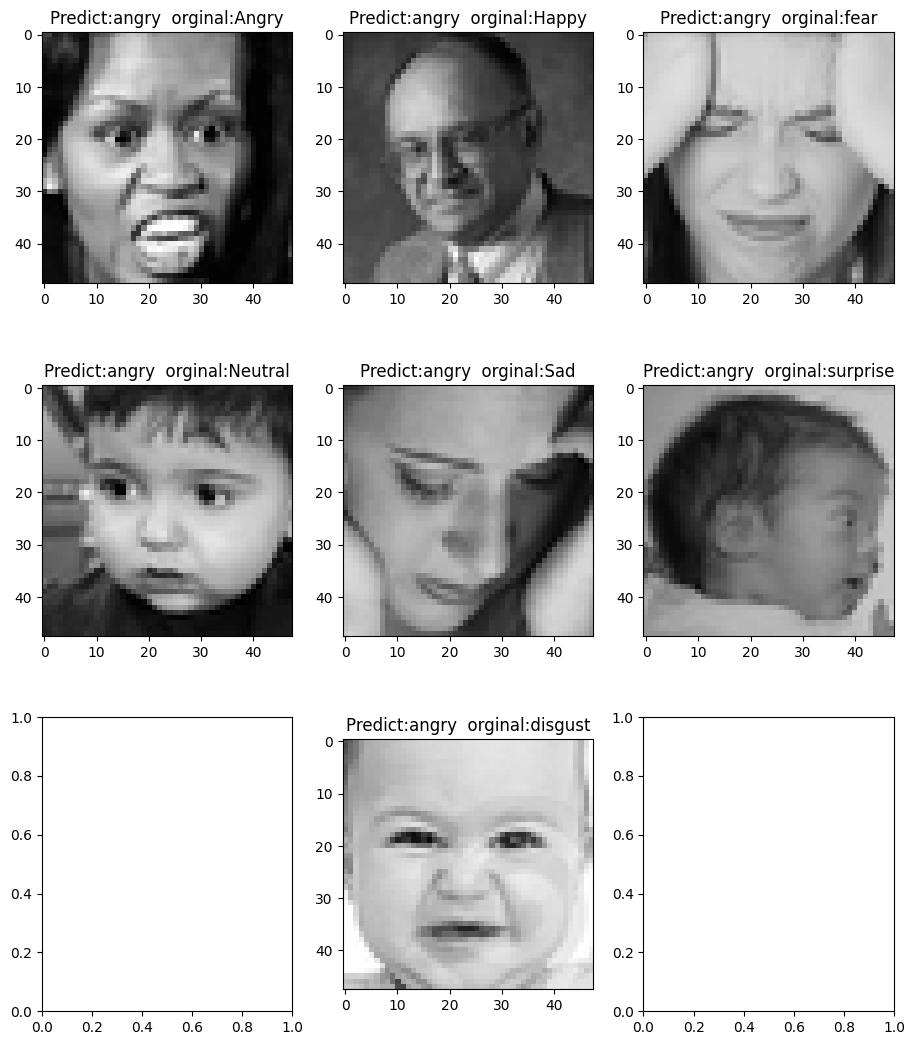

In [29]:
plot_pred_image()